In [41]:
#step 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C://Users/naikp/Downloads/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
#correlation matrix
CM=df[['R&D Spend','Administration','Marketing Spend', 'Profit']].corr()
CM

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


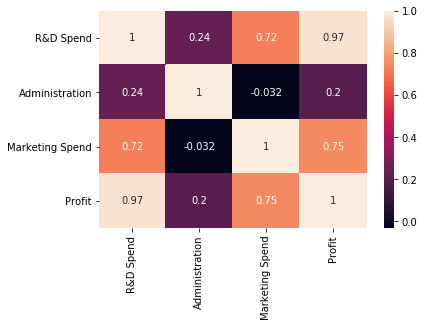

In [44]:
sns.heatmap(CM, annot=True)  #shows R&D has highest profit

In [5]:
cat_df=df.copy()
cat_df['State']=cat_df['State'].astype('category')
cat_df['State']=cat_df['State'].cat.codes

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [6]:
cat_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
df['State'].unique()  #NY=2, CalF=0, Florida=0

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
cat_df_onehot_sklearn=df.copy()  #?

from sklearn.preprocessing import LabelBinarizer
#import pandas as pd
lb=LabelBinarizer()
lb_results=lb.fit_transform(cat_df_onehot_sklearn['State'])

lb_results_df=pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   California  Florida  New York
0           0        0         1
1           1        0         0
2           0        1         0
3           0        0         1
4           0        1         0


In [13]:
#op: one hot encoding(prefix to change name)
cat_df_onehot=df.copy()
cat_df_onehot=pd.get_dummies(cat_df_onehot, columns=['State'])
cat_df_onehot.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [14]:
cat_df_onehot.drop('Profit', axis=1, inplace=True)

In [15]:
cat_df_onehot.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [16]:
cat_df_onehot['Profit']=df['Profit']
cat_df_onehot.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [19]:
#Avoid dummy variable trap
cat_df_onehot.drop('State_Florida', axis=1, inplace=True)

In [20]:
cat_df_onehot.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,191792.06
2,153441.51,101145.55,407934.54,0,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,0,0,166187.94


In [30]:
# Split the dataset into the Training set and Test set
x=np.array(cat_df_onehot[['R&D Spend','Administration','Marketing Spend','State_California','State_New York']])
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        0.00

In [28]:
x.size

250

In [31]:
y=np.array(cat_df_onehot['Profit'])
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [46]:
#step 4th training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

In [34]:
x_train, x_test, y_train, y_test

(array([[1.0002300e+03, 1.2415304e+05, 1.9039300e+03, 0.0000000e+00,
         1.0000000e+00],
        [5.4205000e+02, 5.1743150e+04, 0.0000000e+00, 0.0000000e+00,
         1.0000000e+00],
        [6.5605480e+04, 1.5303206e+05, 1.0713838e+05, 0.0000000e+00,
         1.0000000e+00],
        [1.1452361e+05, 1.2261684e+05, 2.6177623e+05, 0.0000000e+00,
         1.0000000e+00],
        [6.1994480e+04, 1.1564128e+05, 9.1131240e+04, 0.0000000e+00,
         0.0000000e+00],
        [6.3408860e+04, 1.2921961e+05, 4.6085250e+04, 1.0000000e+00,
         0.0000000e+00],
        [7.8013110e+04, 1.2159755e+05, 2.6434606e+05, 1.0000000e+00,
         0.0000000e+00],
        [2.3640930e+04, 9.6189630e+04, 1.4800111e+05, 1.0000000e+00,
         0.0000000e+00],
        [7.6253860e+04, 1.1386730e+05, 2.9866447e+05, 1.0000000e+00,
         0.0000000e+00],
        [1.5505730e+04, 1.2738230e+05, 3.5534170e+04, 0.0000000e+00,
         1.0000000e+00],
        [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000

In [47]:
#step 5  fitting 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred = regressor.predict(x_test)
y_pred

array([103015.20159767, 132582.27760838, 132447.73845188,  71976.0985127 ,
       178537.48221077, 116161.24230153,  67851.69209695,  98791.73374676,
       113969.43533007, 167921.06569577])

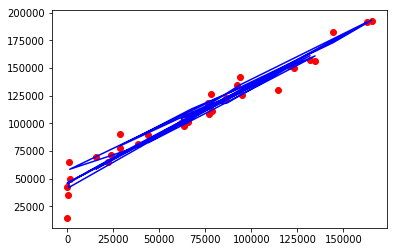

In [40]:
#not useful with multiple inputs
plt.scatter(x_train[:,0:1], y_train, color='red')
plt.plot(x_train[:,0:1], regressor.predict(x_train), color='blue')   

In [49]:
# finding accuracy 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473300781

In [60]:
import statsmodels.formula.api as sm

In [65]:
x=np.append(arr=np.ones((50,1)).astype(int), values = x, axis=1)
x_opt = x[:,[0,1,2,3,4]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()   #at every step drop highest P variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           8.51e-29
Time:                        16:46:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.016e+04   6798.992      7.377      0.000    3.65e+04    6.39e+04
x1             0.8057      0.046     17.646      0.000       0.714       0.898
x2            -0.0268      0.052     -0.520      0.606      -0.131       0.077
x3             0.0272      0.017      1.627      0.111      -0.006       0.061
x4           -70.2265   2828.752     -0.025      0.980   -5767.625    5627.172
==============================================================================
Omnibus:                       14.785   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.242
Skew:                          -0.949   Prob(JB):                     2.44e-05
Kurtosis:                       5.568   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#X=np.append(arr=np.ones((50,1)).astype(int), values = X, axis=1)
x_opt = x[:, [0,1]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           3.50e-32
Time:                        16:49:34   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#other method to do same as above
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     765.9
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           2.49e-42
Time:                        16:41:53   Log-Likelihood:                -543.87
No. Observations:                  50   AIC:                             1098.
Df Residuals:                      45   BIC:                             1107.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7217      0.064     11.260      0.000       0.593       0.851
x2             0.2847      0.038      7.465      0.000       0.208       0.362
x3             0.0830      0.022      3.833      0.000       0.039       0.127
x4          7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
x5          7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""